# Problem Statement

Drugs are generally administered/prescribed by the physicians for a certain
period of time or they are administered at regular intervals, but for various reasons patients
might stop taking the treatment .
Patients stopping a treatment is called dropoff.
We want to study dropoff for “Target Drug”, the aim is to generate insights on what events
lead to patients stopping on “Target Drug”.

# Import needed Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load data from the Parquet file


In [2]:
df = pd.read_parquet('train.parquet')

# Filter data for the target drug incident

In [3]:
target_drug_df = df[df['Incident'] == 'TARGET DRUG']

In [4]:
# Convert 'Date' column to datetime and extract 'Month' from it
target_drug_df['Date'] = pd.to_datetime(target_drug_df['Date'])
target_drug_df['Month'] = target_drug_df['Date'].dt.month

# Calculate drop-off rate by month

In [5]:
dropoff_rates = target_drug_df.groupby('Month')['Patient-Uid'].nunique().diff().fillna(0)

# Visualize the drop-off rate over time

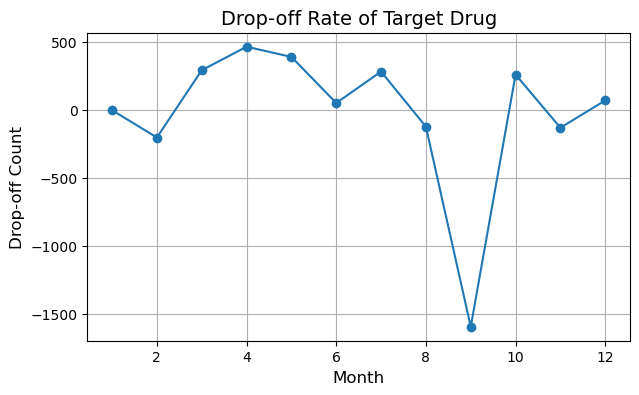

In [6]:
plt.figure(figsize=(7, 4))
plt.plot(dropoff_rates.index, dropoff_rates.values, marker='o', linestyle='-')
plt.xlabel('Month', fontdict={'fontsize': 12})
plt.ylabel('Drop-off Count', fontdict={'fontsize': 12})
plt.title('Drop-off Rate of Target Drug', fontdict={'fontsize': 14})
plt.grid(True)
plt.show()

# Filtering for events driving drop-off

In [7]:
dropoff_events = df.loc[df['Patient-Uid'].isin(target_drug_df['Patient-Uid'])]
dropoff_events = dropoff_events.loc[dropoff_events['Date'] < dropoff_events.groupby('Patient-Uid')['Date'].transform('max')]
dropoff_events = dropoff_events.loc[dropoff_events['Incident'] != 'TARGET DRUG']

# Calculating the frequency of each event 

In [8]:
event_frequency = dropoff_events['Incident'].value_counts()

# Visualization

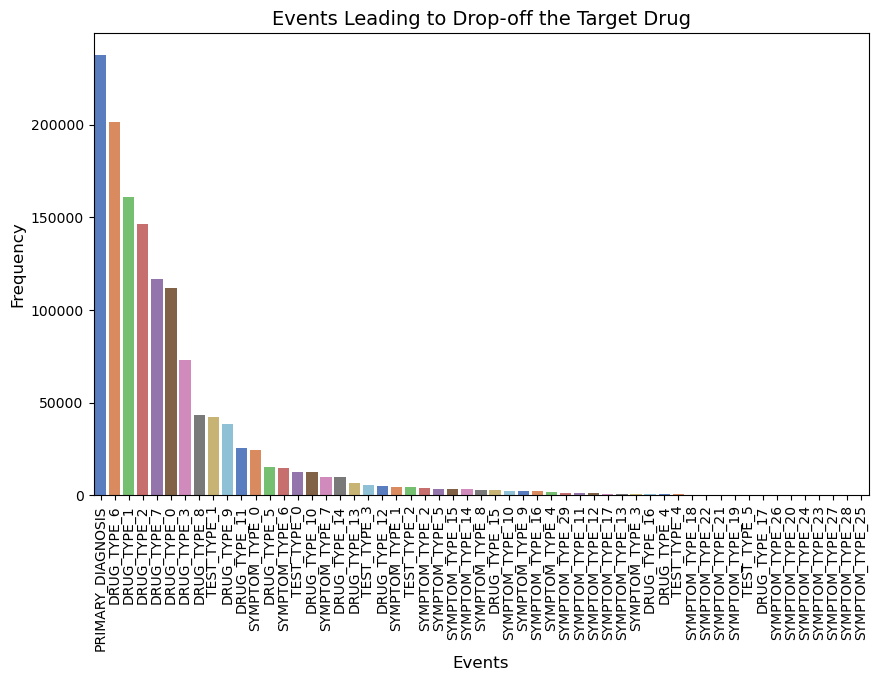

In [9]:
# Plotting the events leading to drop-off with vertical x-axis labels
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=event_frequency.index, y=event_frequency.values, palette="muted")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.xlabel('Events', fontdict={'fontsize': 12})
plt.ylabel('Frequency', fontdict={'fontsize': 12})
plt.title('Events Leading to Drop-off the Target Drug', fontdict={'fontsize': 14})
plt.show()
